In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from path_explain import set_up_environment
from contextual_decomposition import ContextualDecompositionExplainerTF

In [4]:
set_up_environment(visible_devices='0')

In [5]:
x = np.random.randn(100, 2).astype(np.float32)
y = x[:, 0] + np.random.randn(100) * 0.1

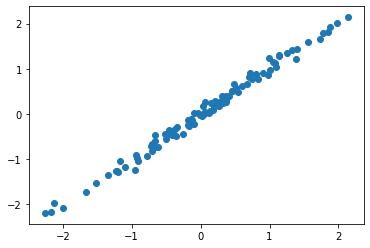

In [6]:
plt.scatter(x[:, 0], y)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(2,)))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(1))

In [8]:
model.layers[0].weights[0]

<tf.Variable 'dense/kernel:0' shape=(2, 8) dtype=float32, numpy=
array([[-1.4963406e-01, -4.7498208e-01, -7.4334443e-02, -6.5172344e-01,
        -4.4775996e-01, -1.4514381e-01,  2.3896384e-01,  7.4586999e-01],
       [-6.6887689e-01, -7.2146016e-01, -5.2559376e-04, -5.9159327e-01,
        -2.2981542e-01, -5.4351085e-01,  1.6322142e-01,  4.9301279e-01]],
      dtype=float32)>

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.MeanSquaredError())
model.fit(x, y, batch_size=50, epochs=10)

Train on 100 samples
Epoch 1/10
100/100 [==============================] - 0s 3ms/sample - loss: 1.4285
Epoch 2/10
100/100 [==============================] - 0s 41us/sample - loss: 0.8153
Epoch 3/10
100/100 [==============================] - 0s 44us/sample - loss: 0.5439
Epoch 4/10
100/100 [==============================] - 0s 42us/sample - loss: 0.3674
Epoch 5/10
100/100 [==============================] - 0s 40us/sample - loss: 0.2642
Epoch 6/10
100/100 [==============================] - 0s 40us/sample - loss: 0.1996
Epoch 7/10
100/100 [==============================] - 0s 40us/sample - loss: 0.1457
Epoch 8/10
100/100 [==============================] - 0s 40us/sample - loss: 0.1224
Epoch 9/10
100/100 [==============================] - 0s 40us/sample - loss: 0.0991
Epoch 10/10
100/100 [==============================] - 0s 40us/sample - loss: 0.0884


In [10]:
y_pred = model.predict(x)

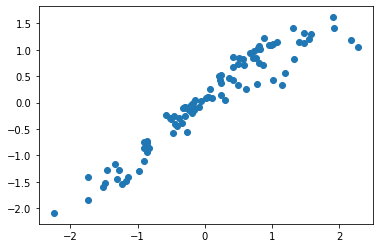

In [11]:
plt.scatter(y, y_pred)

In [12]:
explainer = ContextualDecompositionExplainerTF(model)

In [13]:
beta_attributions, gamma_attributions = explainer.attributions(inputs=x,
                                                               batch_size=50,
                                                               output_indices=0,
                                                               verbose=True)

100%|██████████| 2/2 [00:00<00:00, 347.92it/s]


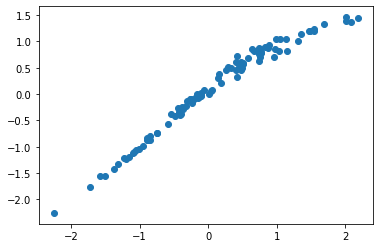

In [14]:
plt.scatter(x[:, 0], beta_attributions[:, 0])

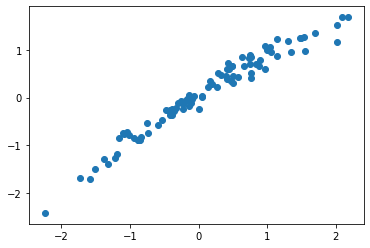

In [15]:
plt.scatter(x[:, 0], beta_attributions[:, 0] - gamma_attributions[:, 0])

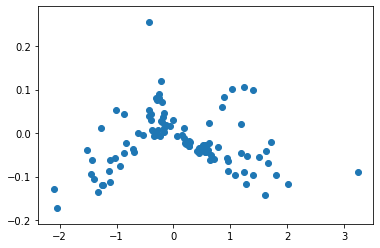

In [16]:
plt.scatter(x[:, 1], beta_attributions[:, 1])

In [17]:
beta_interactions, gamma_interactions = explainer.interactions(inputs=x,
                                                               batch_size=50,
                                                               output_indices=0,
                                                               verbose=True)

100%|██████████| 2/2 [00:00<00:00, 345.28it/s]


In [34]:
beta_attributions[0]

array([ 1.0077835 , -0.05744376], dtype=float32)

In [35]:
beta_interactions[0]

array([[ 1.00778353,  0.83217013],
       [ 0.83217013, -0.05744376]])

In [41]:
interactions = beta_interactions - beta_attributions[:, :, np.newaxis] - beta_attributions[:, np.newaxis, :]
interactions[:, np.arange(2), np.arange(2)] = beta_attributions

In [42]:
interactions[0]

array([[ 1.00778353, -0.11816964],
       [-0.11816964, -0.05744376]])